In [ ]:
pip install sweetviz

In [ ]:
import pandas as pd
import plotly.express as px
import sweetviz as sviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#kera
#scikit-learn
#tensorflow

In [ ]:
caminho = '/content/drive/MyDrive/MINICURSO PYTHON/Minicurso de Python/Steel_industry_data.csv'

tabela = pd.read_csv(caminho)
tabela

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
tabela.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [ ]:
#pd.to_datetime, transformar tudo para o formato de datas
tabela['date'] = pd.to_datetime(tabela['date'])
#setindex transformar a coluna escolhida em indice
tabela = tabela.set_index('date')
tabela

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   
2018-01-01 01:15:00       3.82                                  4.50   
...                        ...                                   ...   
2018-12-31 23:00:00       3.85                                  4.86   
2018-12-31 23:15:00       3.74                                  3.74   
2018-12-31 23:30:00       3.78                                  3.17   
2018-12-31 23:45:00       3.78                                  3.06   
2018-12-31 00:00:00       3.67                                  3.02   

                     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                   
2018-01-01 00:15:00                                  0.00        0.0   
2018-01-01 00:30:00                                  0.00        0.0   
2018-01-01 00:45:00                                  0.00        0.0   
2018-01-01 01:00:00                                  0.00        0.0   
2018-01-01 01:15:00                                  0.00        0.0   
...                                                   ...        ...   
2018-12-31 23:00:00                                  0.00        0.0   
2018-12-31 23:15:00                                  0.00        0.0   
2018-12-31 23:30:00                                  0.07        0.0   
2018-12-31 23:45:00                                  0.11        0.0   
2018-12-31 00:00:00                                  0.07        0.0   

                     Lagging_Current_Power_Factor  \
date                                                
2018-01-01 00:15:00                         73.21   
2018-01-01 00:30:00                         66.77   
2018-01-01 00:45:00                         70.28   
2018-01-01 01:00:00                         68.09   
2018-01-01 01:15:00                         64.72   
...                                           ...   
2018-12-31 23:00:00                         62.10   
2018-12-31 23:15:00                         70.71   
2018-12-31 23:30:00                         76.62   
2018-12-31 23:45:00                         77.72   
2018-12-31 00:00:00                         77.22   

                     Leading_Current_Power_Factor    NSM WeekStatus  \
date                                                                  
2018-01-01 00:15:00                        100.00    900    Weekday   
2018-01-01 00:30:00                        100.00   1800    Weekday   
2018-01-01 00:45:00                        100.00   2700    Weekday   
2018-01-01 01:00:00                        100.00   3600    Weekday   
2018-01-01 01:15:00                        100.00   4500    Weekday   
...                                           ...    ...        ...   
2018-12-31 23:00:00                        100.00  82800    Weekday   
2018-12-31 23:15:00                        100.00  83700    Weekday   
2018-12-31 23:30:00                         99.98  84600    Weekday   
2018-12-31 23:45:00                         99.96  85500    Weekday   
2018-12-31 00:00:00                         99.98      0    Weekday   

                    Day_of_week   Load_Type  
date                                         
2018-01-01 00:15:00      Monday  Light_Load  
2018-01-01 00:30:00      Monday  Light_Load  
2018-01-01 00:45:00      Monday  Light_Load  
2018-01-01 01:00:00      Monday  Light_Load  
2018-01-01 01:15:00      Monday  Light_Load  
...                         ...         ...  
2018-12-31 23:00:00      Monday  Light_Load  
2018-12-31 23:15:00      Monday  Light_Load  
2018-12-31 23:30:00      Monday  Light_Load  
2018-12-31 23:45:00      Mo

In [ ]:
# mostra o que seria o r²
# correlaciona a informação da linha com a da coluna, e da o r² pra ver se elas tem relação
tabela.corr()

Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2(tCO2)                              0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   
NSM                                    0.234610   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2(tCO2)                                                         0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   
NSM                                                               0.082662   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                        -0.324922   
Lagging_Current_Reactive.Power_kVarh                             -0.405142   
Leading_Current_Reactive_Power_kVarh                              1.000000   
CO2(tCO2)                                                        -0.332777   
Lagging_Current_Power_Factor                                      0.526770   
Leading_Current_Power_Factor                                     -0.944039   
NSM                                                               0.371605   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                              0.988180                      0.385960   
Lagging_Current_Reactive.Power_kVarh   0.886948                      0.144534   
Leading_Current_Reactive_Power_kVarh  -0.332777                      0.526770   
CO2(tCO2)                              1.000000                      0.379605   
Lagging_Current_Power_Factor           0.379605                      1.000000   
Leading_Current_Power_Factor           0.360019                     -0.519967   
NSM                                    0.231726                      0.565270   

                                      Leading_Current_Power_Factor       NSM  
Usage_kWh                                                 0.353566  0.234610  
Lagging_Current_Reactive.Power_kVarh                      0.407716  0.082662  
Leading_Current_Reactive_Power_kVarh                     -0.944039  0.371605  
CO2(tCO2)                                                 0.360019  0.231726  
Lagging_Current_Power_Factor                             -0.519967  0.565270  
Leading_Current_Power_Factor                              1.000000 -0.360563  
NSM                                                      -0.360563  1.000000

In [ ]:
grafico_boxplot = px.box(tabela[['Usage_kWh',
                                 'Lagging_Current_Reactive.Power_kVarh'	,
                                 'Leading_Current_Reactive_Power_kVarh'	,
                                 'CO2(tCO2)','Lagging_Current_Power_Factor'	,
                                 'Leading_Current_Power_Factor',
                                #  'NSM'
                                 ]])
grafico_boxplot.show()

In [ ]:
#fazer um histograma com a variação das colunas ou da coluna que mais importa
#use px.histograma

                                             |          | [  0%]   00:00 -> (? left)


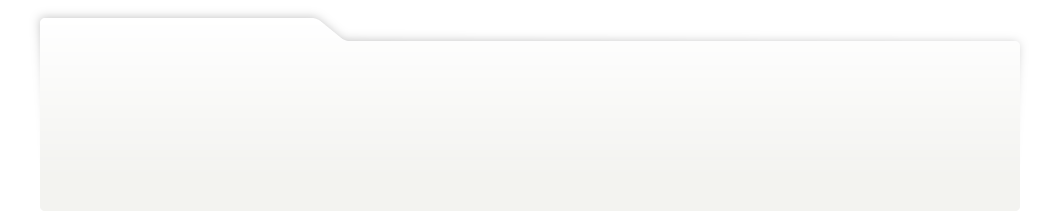
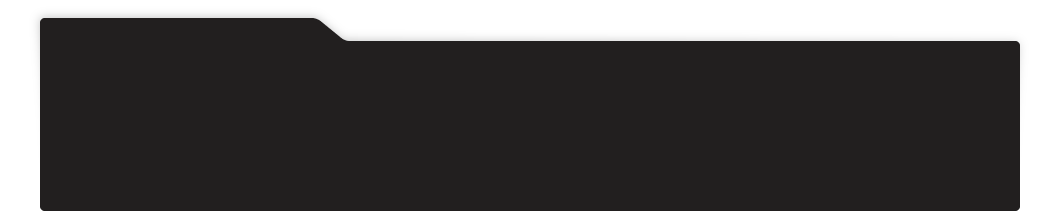
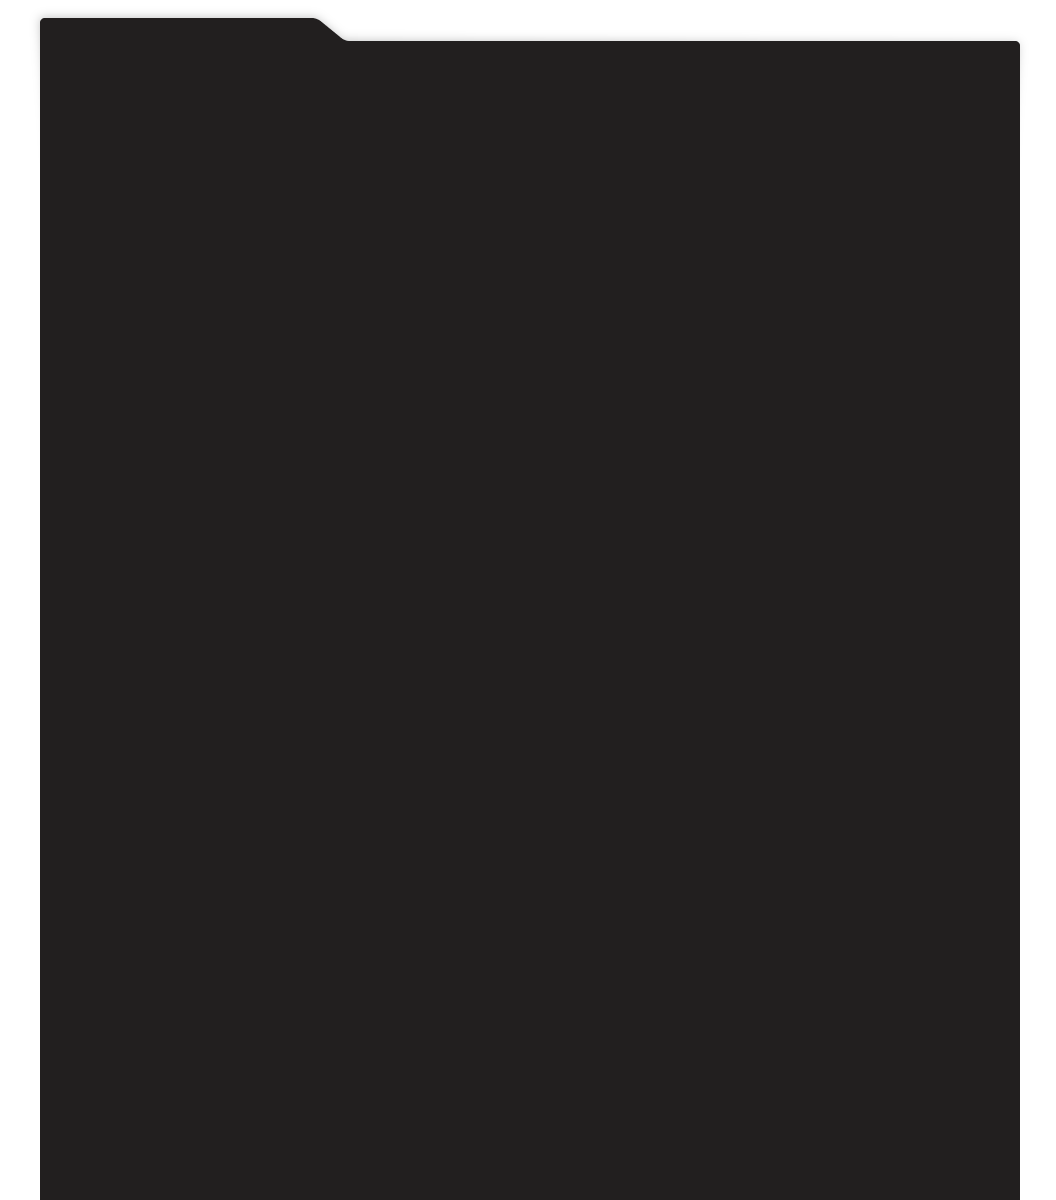
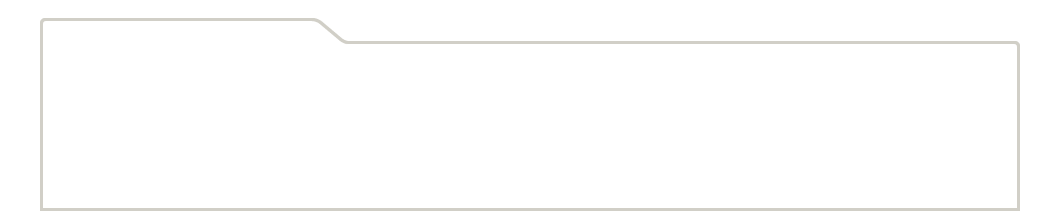
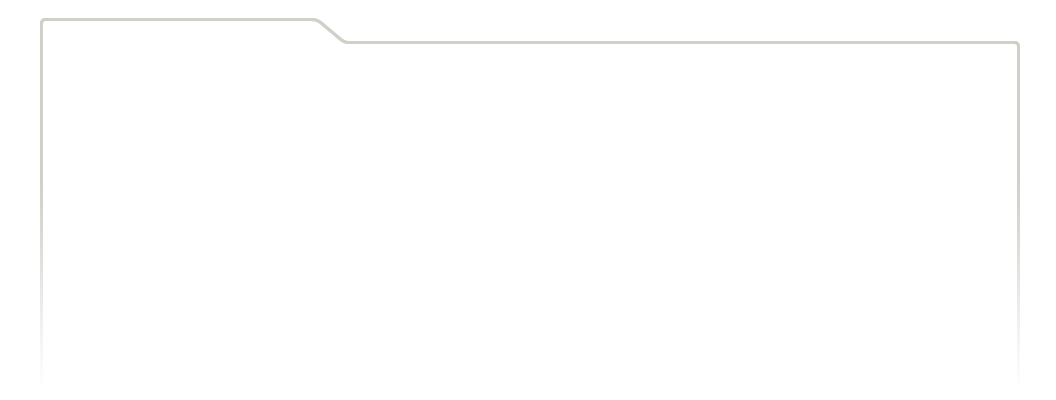
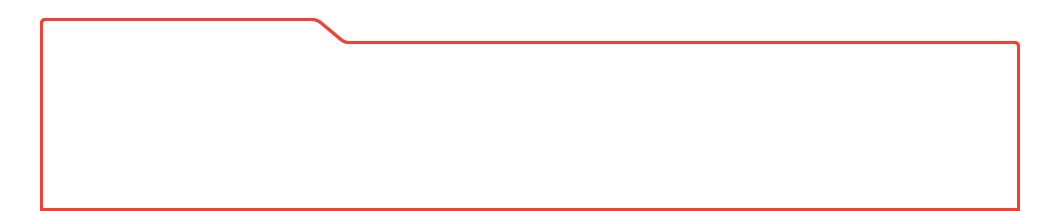
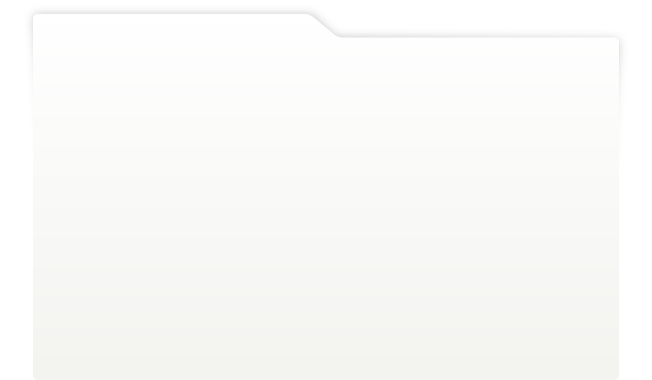
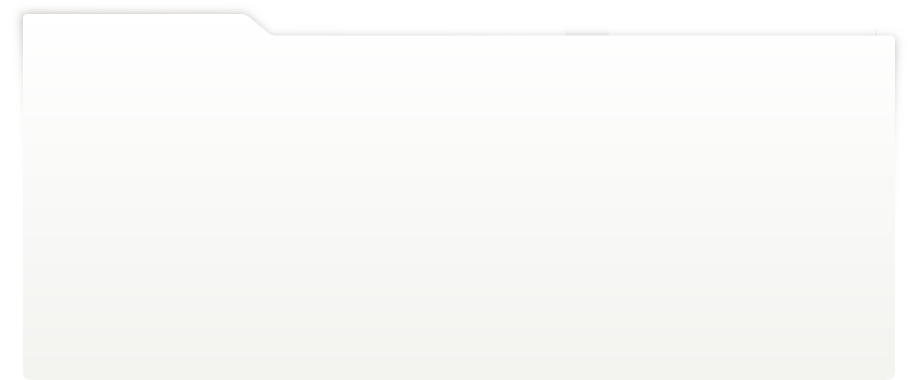
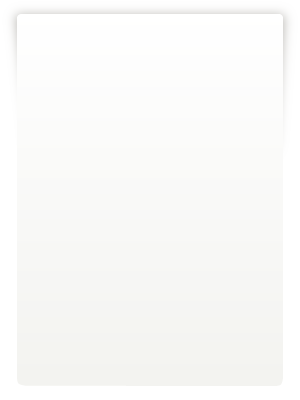
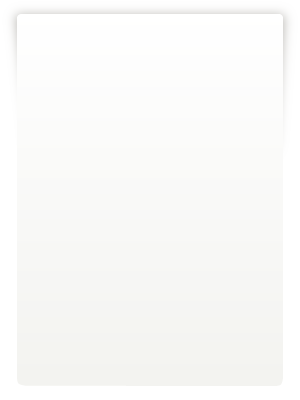
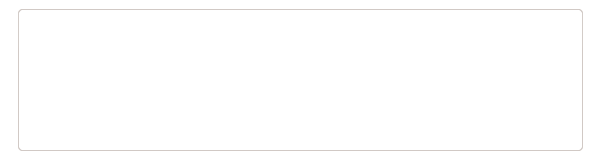
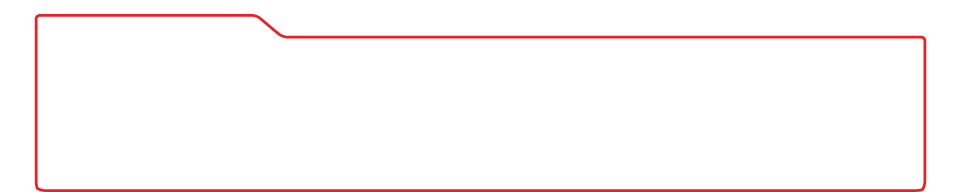
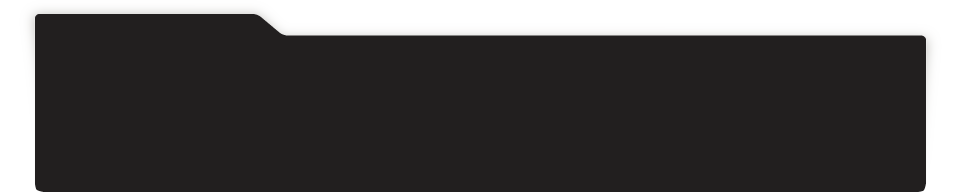
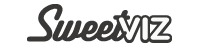
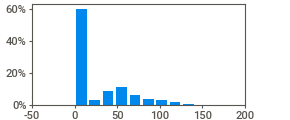
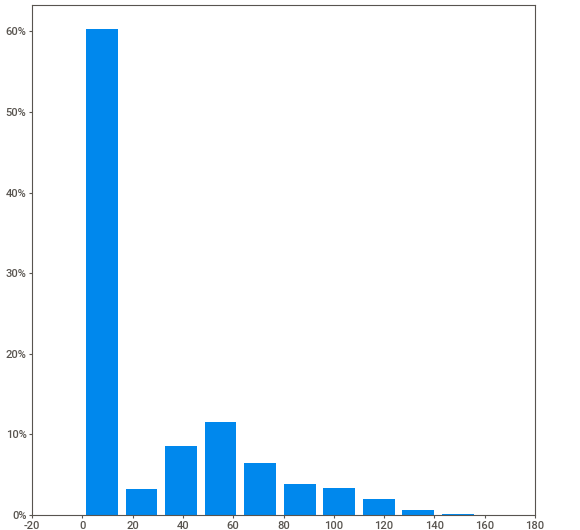
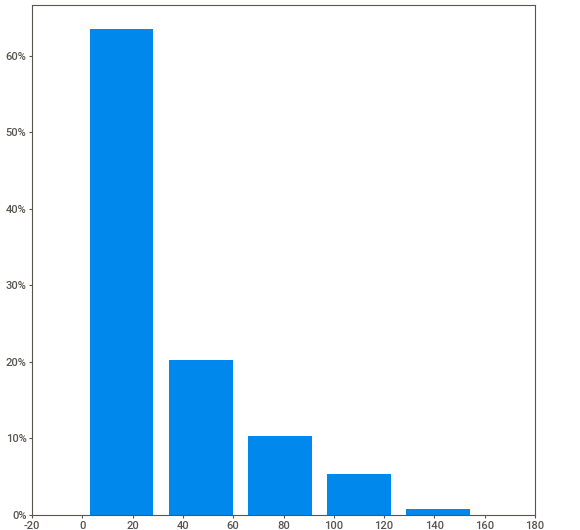
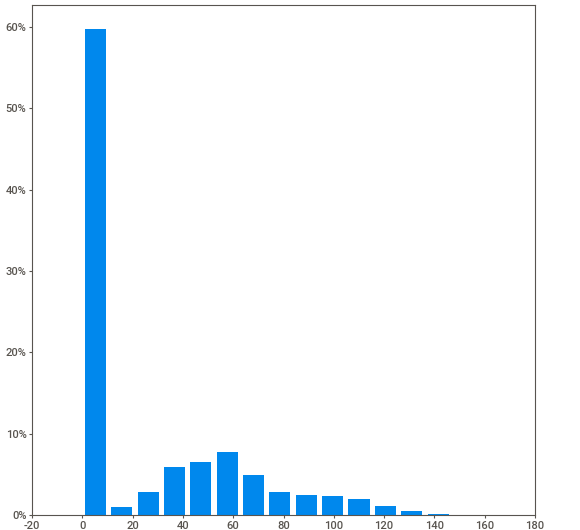
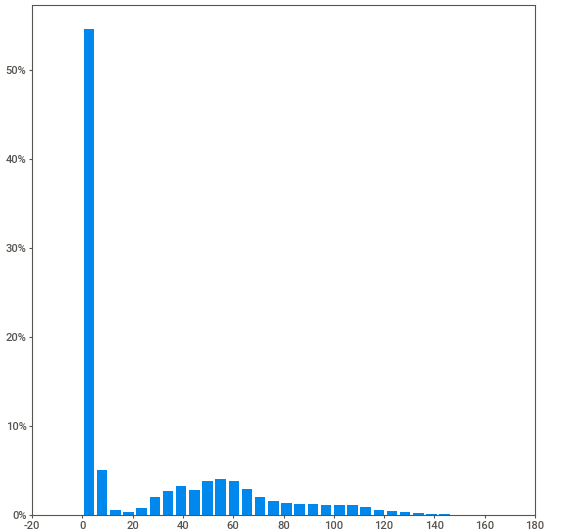
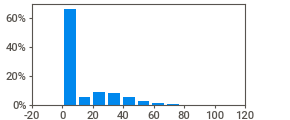
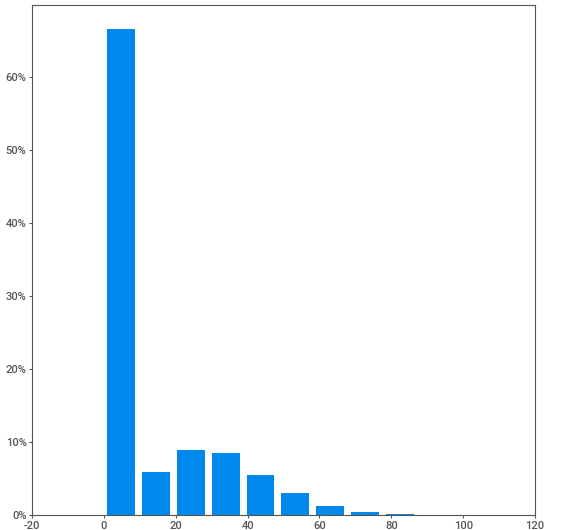
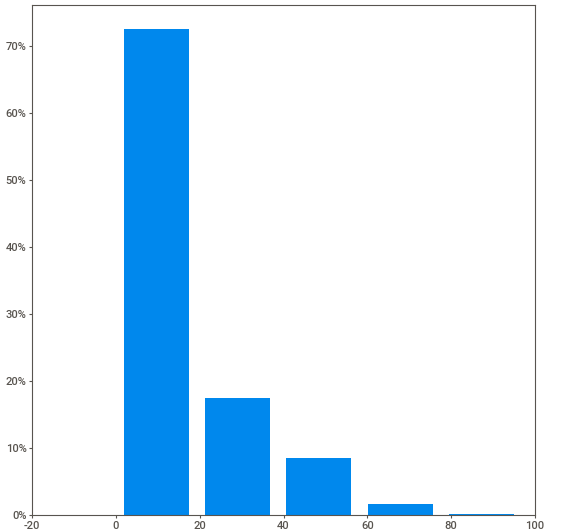
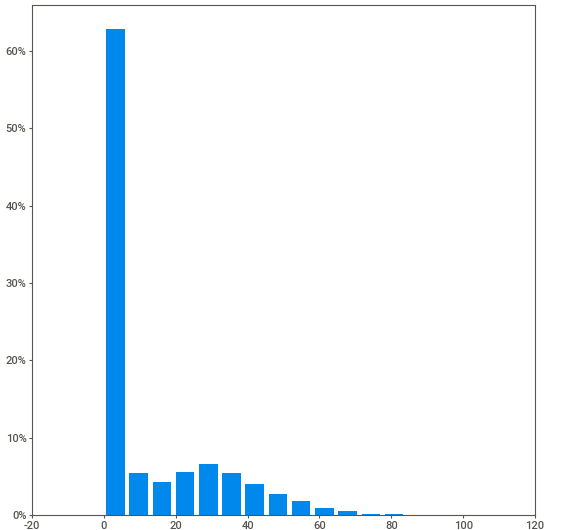
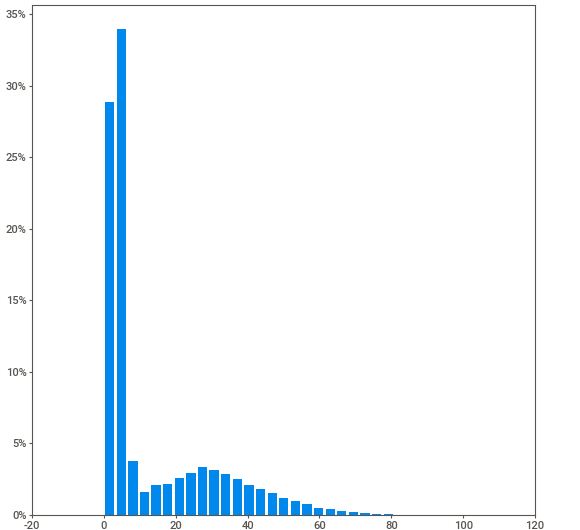
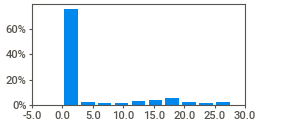
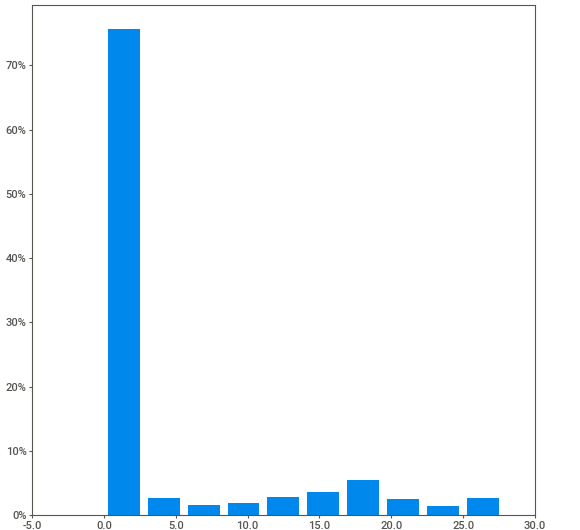
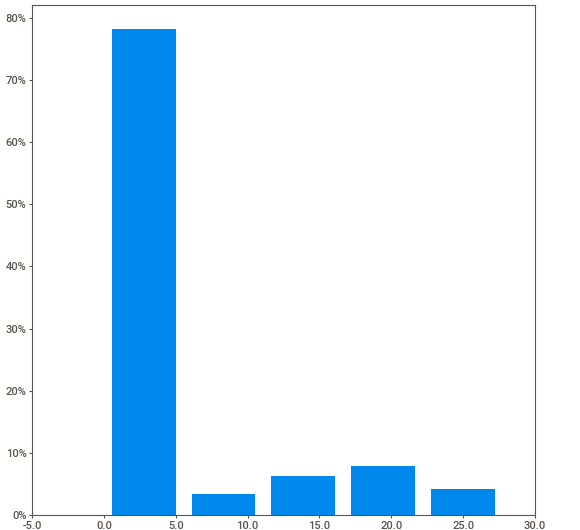
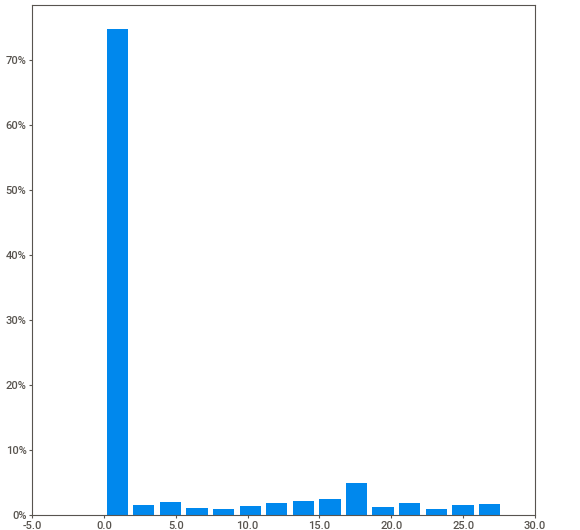
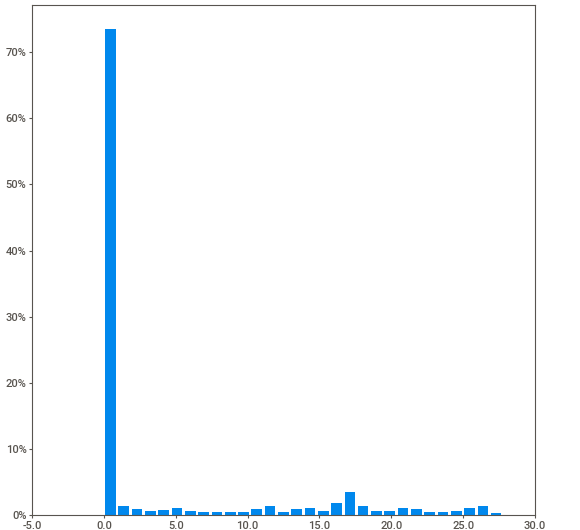
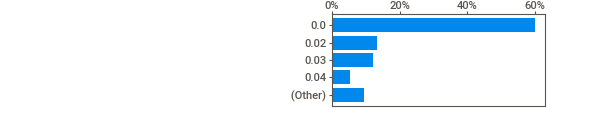
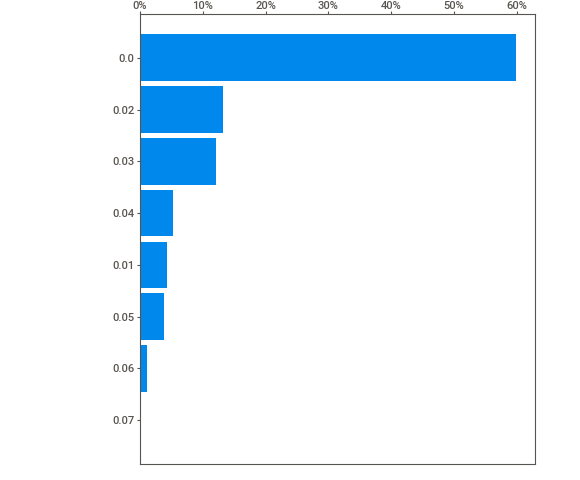
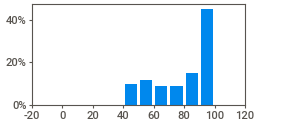
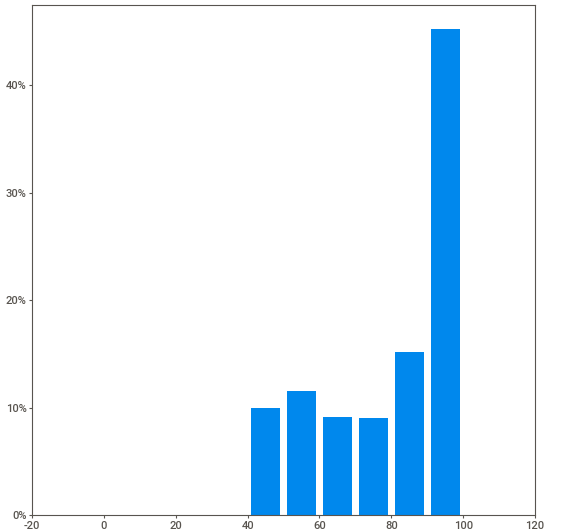
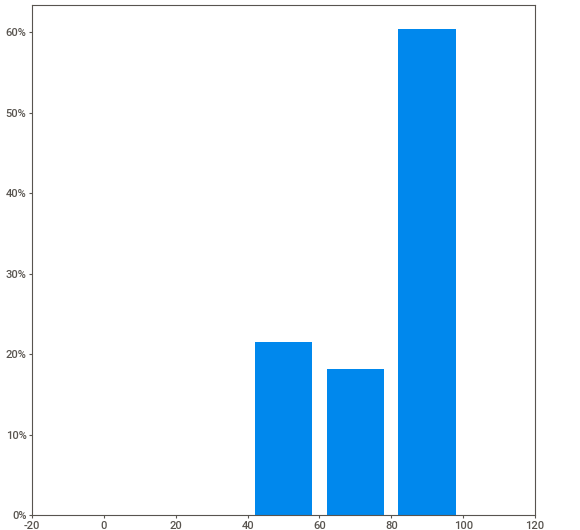
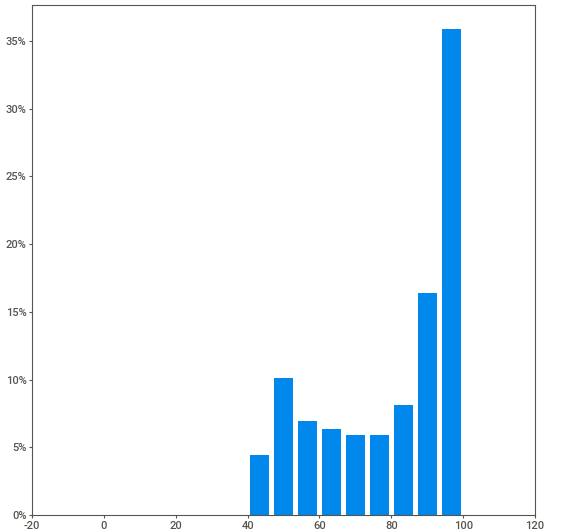
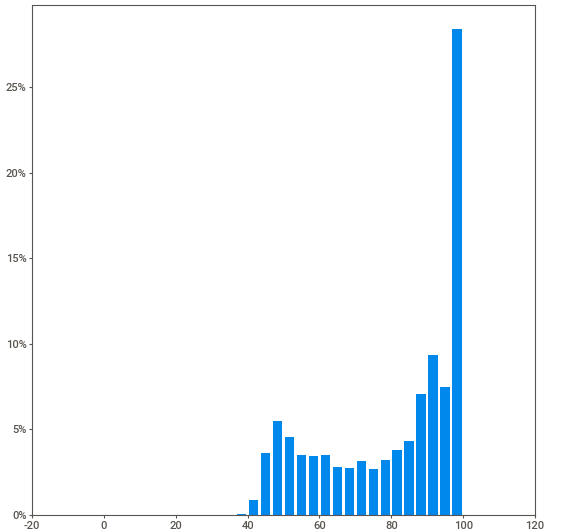
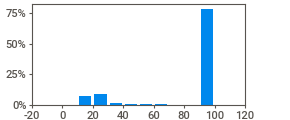
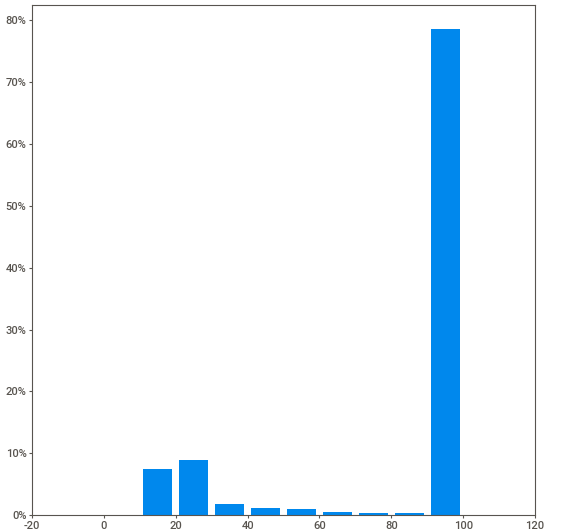
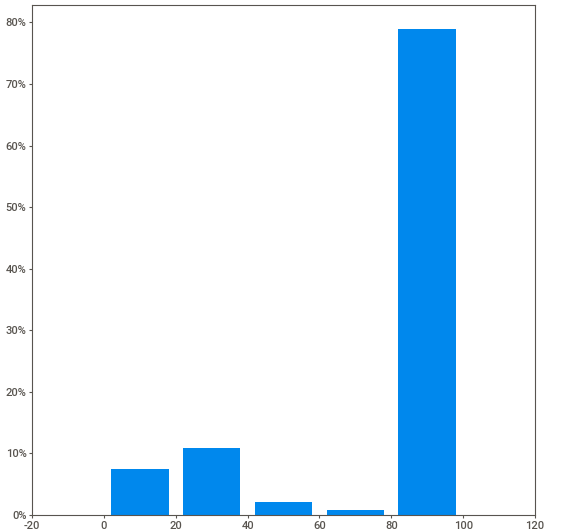
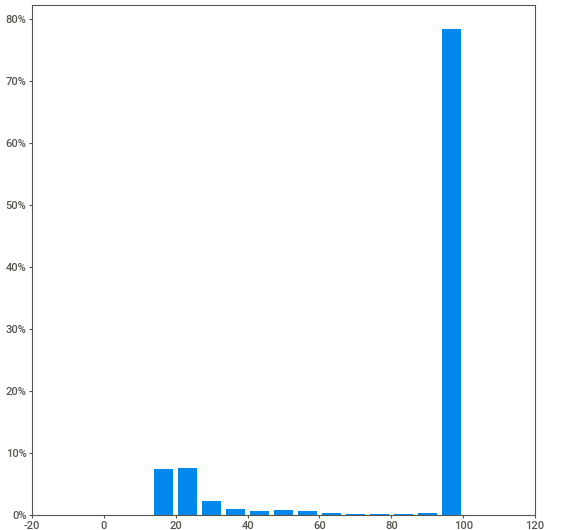
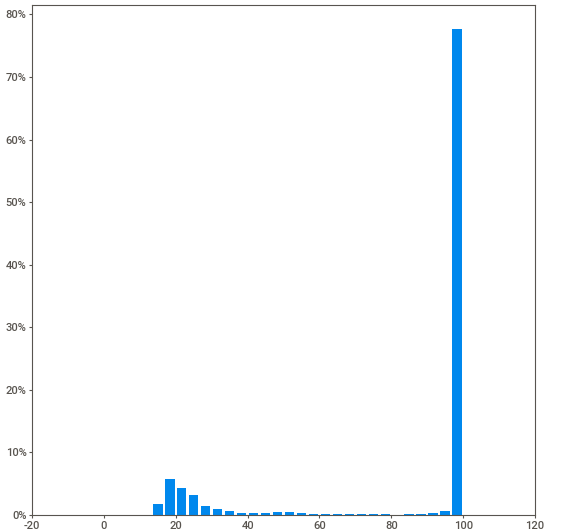
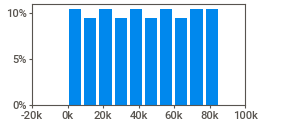
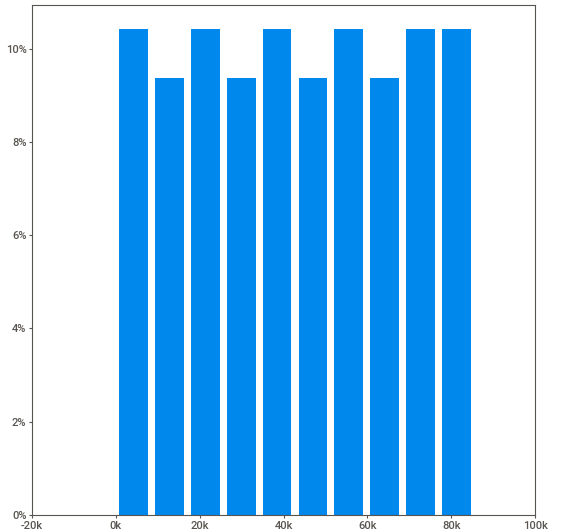
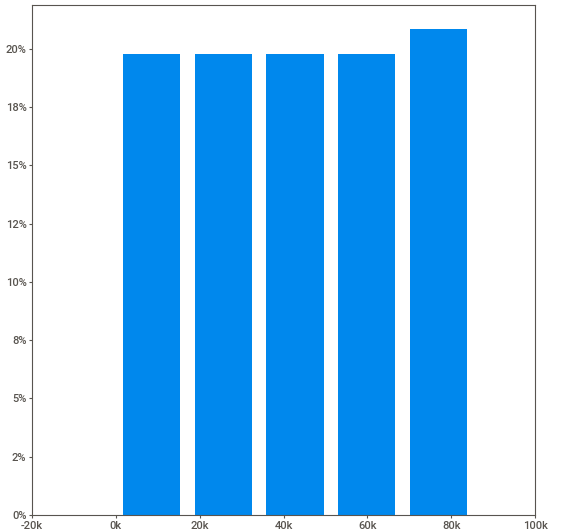
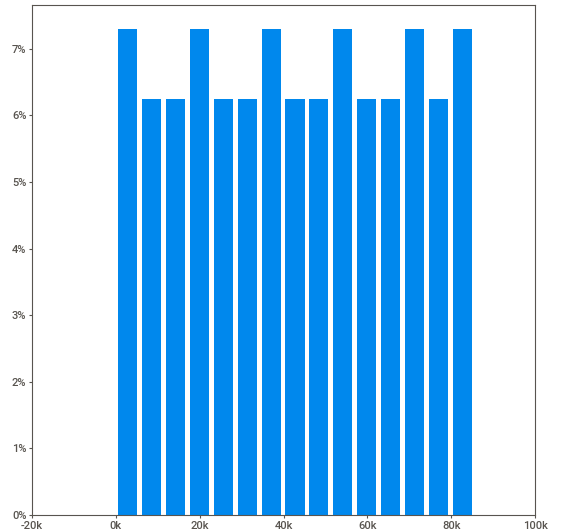
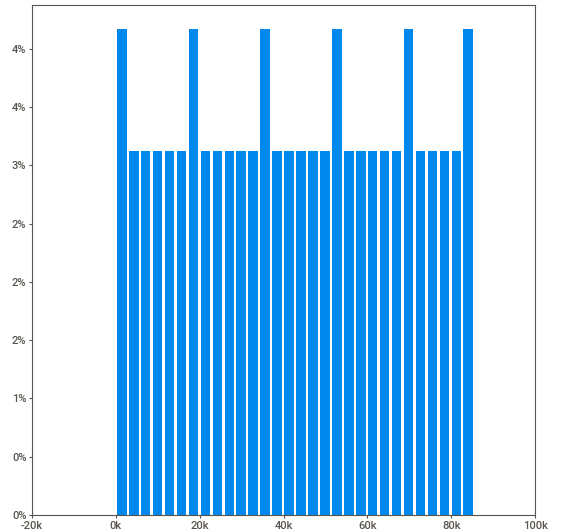
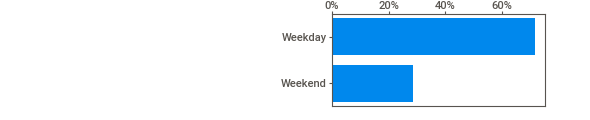
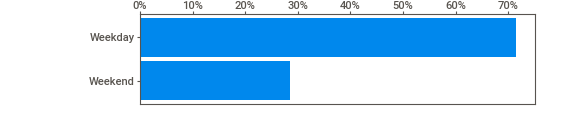
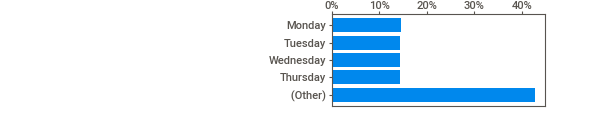
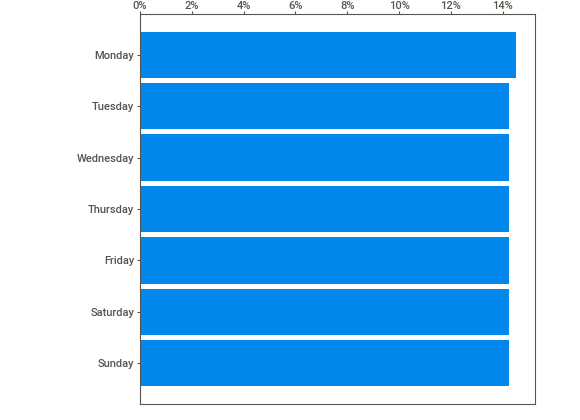
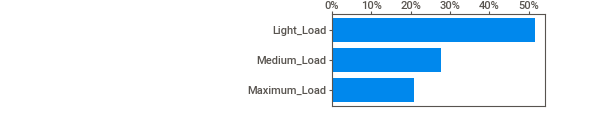
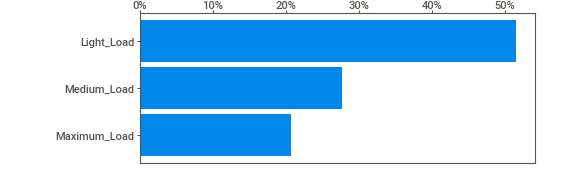
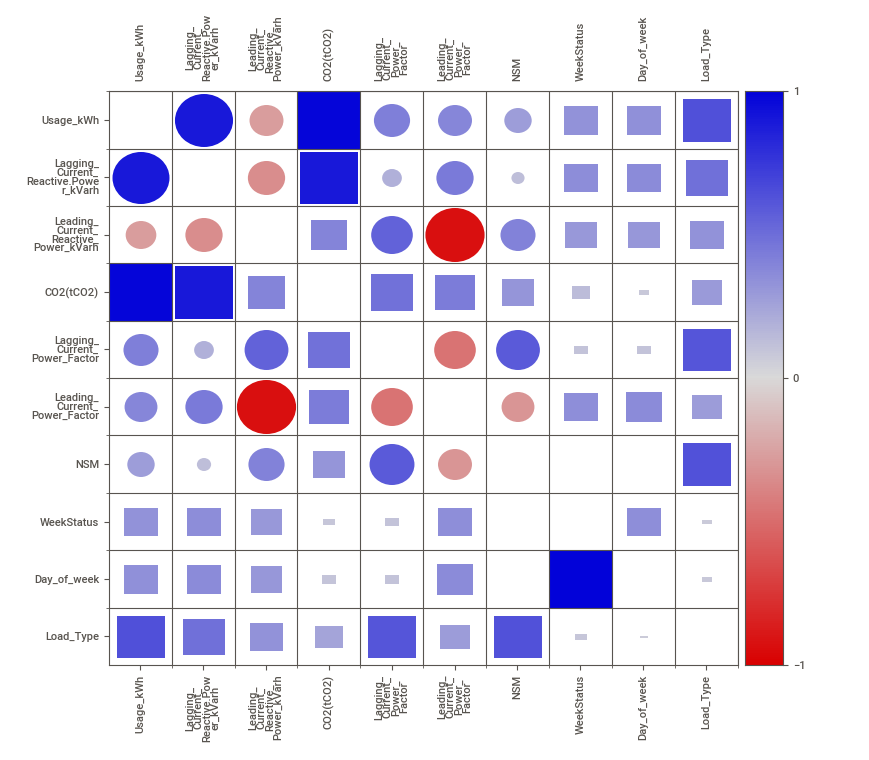
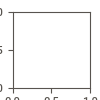

In [ ]:
analise = sviz.analyze(tabela)
analise.show_notebook()

In [ ]:
tabela = pd.get_dummies(tabela)
tabela

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   
2018-01-01 01:15:00       3.82                                  4.50   
...                        ...                                   ...   
2018-12-31 23:00:00       3.85                                  4.86   
2018-12-31 23:15:00       3.74                                  3.74   
2018-12-31 23:30:00       3.78                                  3.17   
2018-12-31 23:45:00       3.78                                  3.06   
2018-12-31 00:00:00       3.67                                  3.02   

                     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                   
2018-01-01 00:15:00                                  0.00        0.0   
2018-01-01 00:30:00                                  0.00        0.0   
2018-01-01 00:45:00                                  0.00        0.0   
2018-01-01 01:00:00                                  0.00        0.0   
2018-01-01 01:15:00                                  0.00        0.0   
...                                                   ...        ...   
2018-12-31 23:00:00                                  0.00        0.0   
2018-12-31 23:15:00                                  0.00        0.0   
2018-12-31 23:30:00                                  0.07        0.0   
2018-12-31 23:45:00                                  0.11        0.0   
2018-12-31 00:00:00                                  0.07        0.0   

                     Lagging_Current_Power_Factor  \
date                                                
2018-01-01 00:15:00                         73.21   
2018-01-01 00:30:00                         66.77   
2018-01-01 00:45:00                         70.28   
2018-01-01 01:00:00                         68.09   
2018-01-01 01:15:00                         64.72   
...                                           ...   
2018-12-31 23:00:00                         62.10   
2018-12-31 23:15:00                         70.71   
2018-12-31 23:30:00                         76.62   
2018-12-31 23:45:00                         77.72   
2018-12-31 00:00:00                         77.22   

                     Leading_Current_Power_Factor    NSM  WeekStatus_Weekday  \
date                                                                           
2018-01-01 00:15:00                        100.00    900                   1   
2018-01-01 00:30:00                        100.00   1800                   1   
2018-01-01 00:45:00                        100.00   2700                   1   
2018-01-01 01:00:00                        100.00   3600                   1   
2018-01-01 01:15:00                        100.00   4500                   1   
...                                           ...    ...                 ...   
2018-12-31 23:00:00                        100.00  82800                   1   
2018-12-31 23:15:00                        100.00  83700                   1   
2018-12-31 23:30:00                         99.98  84600                   1   
2018-12-31 23:45:00                         99.96  85500                   1   
2018-12-31 00:00:00                         99.98      0                   1   

                     WeekStatus_Weekend  Day_of_week_Friday  \
date                                                          
2018-01-01 00:15:00                   0                   0   
2018-01-01 00:30:00                   0                   0   
2018-01-01 00:45:00                   0                   0   
2018-01-01 01:00:00                   0                   0   
2018-01-01 01:15:00                   

In [ ]:
y = tabela['Usage_kWh']
x = tabela.drop('Usage_kWh', axis=1) #axis = 1 diz que é coluna, axis = 0 diz que é linha

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.2)

x_teste # tem 18 colunas por exemplo, não é uma regressão com um único x, igual faz no excel normalmente

Lagging_Current_Reactive.Power_kVarh  \
date                                                        
2018-08-31 01:45:00                                  5.18   
2018-07-22 15:30:00                                  0.00   
2018-09-21 17:15:00                                  0.00   
2018-10-16 04:00:00                                  6.19   
2018-02-03 14:30:00                                 13.10   
...                                                   ...   
2018-05-03 23:00:00                                  5.80   
2018-07-29 18:45:00                                  0.00   
2018-04-02 09:45:00                                  0.00   
2018-12-02 10:15:00                                 57.13   
2018-10-17 10:15:00                                 34.24   

                     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                   
2018-08-31 01:45:00                                  0.00       0.00   
2018-07-22 15:30:00                                 16.99       0.00   
2018-09-21 17:15:00                                 18.18       0.00   
2018-10-16 04:00:00                                  0.00       0.00   
2018-02-03 14:30:00                                  0.58       0.04   
...                                                   ...        ...   
2018-05-03 23:00:00                                  0.00       0.00   
2018-07-29 18:45:00                                 10.69       0.00   
2018-04-02 09:45:00                                 26.17       0.00   
2018-12-02 10:15:00                                  0.00       0.06   
2018-10-17 10:15:00                                  0.00       0.03   

                     Lagging_Current_Power_Factor  \
date                                                
2018-08-31 01:45:00                         46.76   
2018-07-22 15:30:00                        100.00   
2018-09-21 17:15:00                        100.00   
2018-10-16 04:00:00                         45.58   
2018-02-03 14:30:00                         98.84   
...                                           ...   
2018-05-03 23:00:00                         75.94   
2018-07-29 18:45:00                        100.00   
2018-04-02 09:45:00                        100.00   
2018-12-02 10:15:00                         91.30   
2018-10-17 10:15:00                         89.59   

                     Leading_Current_Power_Factor    NSM  WeekStatus_Weekday  \
date                                                                           
2018-08-31 01:45:00                        100.00   6300                   1   
2018-07-22 15:30:00                         17.11  55800                   0   
2018-09-21 17:15:00                         18.12  62100                   1   
2018-10-16 04:00:00                        100.00  14400                   1   
2018-02-03 14:30:00                        100.00  52200                   1   
...                                           ...    ...                 ...   
2018-05-03 23:00:00                        100.00  82800                   1   
2018-07-29 18:45:00                         26.60  67500                   0   
2018-04-02 09:45:00                         23.02  35100                   0   
2018-12-02 10:15:00                        100.00  36900                   1   
2018-10-17 10:15:00                        100.00  36900                   1   

                     WeekStatus_Weekend  Day_of_week_Friday  \
date                                                          
2018-08-31 01:45:00                   0                   1   
2018-07-22 15:30:00                   1                   0   
2018-09-21 17:15:00                   0                   1   
2018-10-16 04:00:00                   0                   0   
2018-02-03 14:30:00                   0                   1   
...                                 ...                 ...   
2018-05-03 23:00:00                   0                

In [ ]:
linear = LinearRegression()
linear.fit(x_treino, y_treino)
linear.score(x_teste, y_teste)

0.981134763819485

In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(x_treino, y_treino) #fit para o treinamento
ridge.score(x_teste, y_teste) #score para o teste

0.9451658928501021

In [ ]:
lasso = Lasso()
lasso.fit(x_treino, y_treino)
lasso.score(x_teste, y_teste)

0.912030630956766

In [ ]:
#y_teste são os valoores de kWh utilizados, que eu estou tentando prever

y_previsao = linear.predict(x_teste) #TESTAR PARA O MODELO LASSO E OS OUTROS
y_previsao

#retorna um array com todos os valores previstos, agora vamos comparar com o y real
#se  o previsto estiver perto do real o gráfico deve ser uma reta, ou próximo disso


array([  1.27153445,   2.58782932,   4.2986278 , ...,   3.8984462 ,
       122.88596084,  67.07835407])

In [ ]:
eixo_y = y_previsao
eixo_x = y_teste

regressao = px.scatter(x = eixo_x,y=eixo_y,
                       title='Regressão',
                       labels={'y':'predição',
                               'x':'real'},
                       trendline='ols',
                       trendline_color_override = 'red' ) #scatter é o gráfico de regressão
regressao.show()